<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/Polynomial_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('/content/1.ushape.csv',header=None)
df.columns = ['X','Y','class']

In [11]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [12]:
X = df.iloc[:,0:2].values     # X = first 2 columns (X,y)
y = df.iloc[:,-1].values      # y = the class column

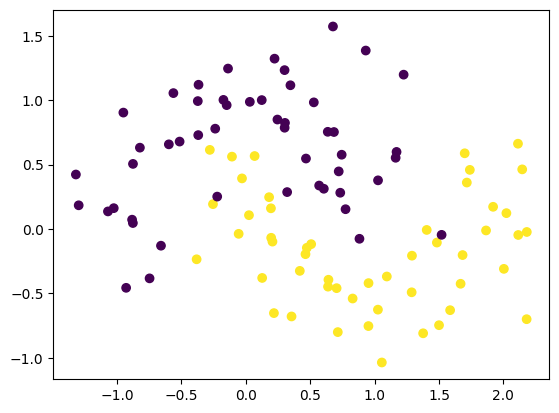

In [14]:
plt.scatter(X[:,0],X[:,1],c=y)

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

<Axes: >

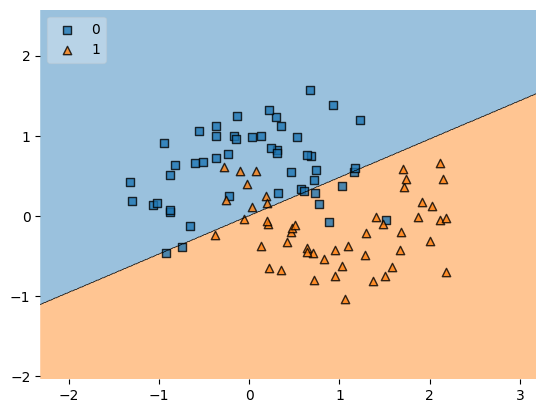

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),log_reg,legend=2)

In [18]:
from sklearn.model_selection import cross_val_score
mean_cross_val = np.mean(cross_val_score(log_reg,X,y,scoring='accuracy',cv=10))
print(mean_cross_val)

0.8300000000000001


In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [38]:
print(np.mean(cross_val_score(log_reg , X_trf , y , scoring='accuracy',cv=10)))

0.9


In [40]:
# plot the non linear decision boundaries

def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf,y)

    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

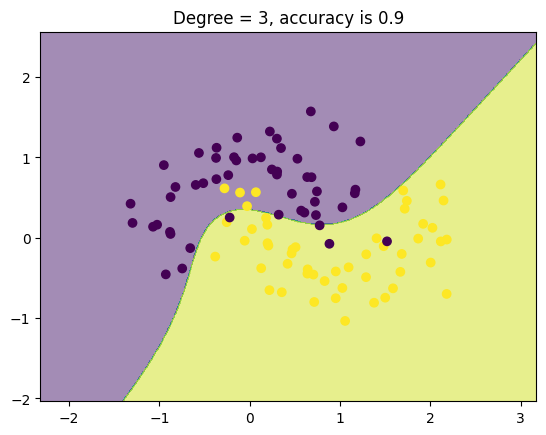

In [43]:
plot_decision_boundary(X,y,3)